In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
import statsmodels.api as sm

In [3]:
cigData = pd.read_csv('CowboyCigsData.csv', index_col=0)
col_rename = {
    'Time': 'Month',
    '#CigSales': 'Cigarette_Sales'
}
cigData.rename(columns=col_rename, inplace=True)
cigData.Month = pd.to_datetime(cigData.Month)
cigData.set_index('Month', inplace=True)
cigData.index.freq = cigData.index.inferred_freq
cigData.head()

,Cigarette_Sales
Month,
1949-01-01,1000112
1949-02-01,1000118
1949-03-01,1000132
1949-04-01,1000129
1949-05-01,1000121


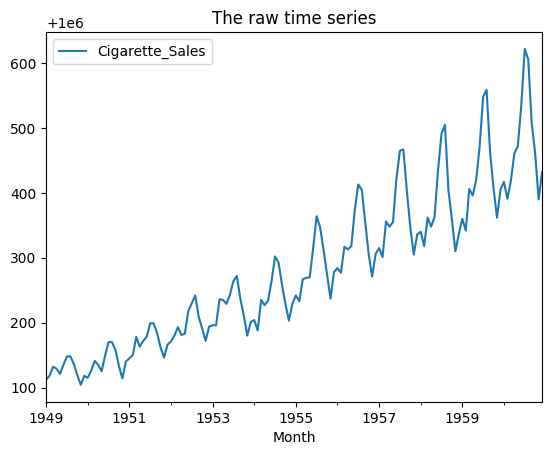

In [5]:
ax = cigData.plot()
ax.set_title("The raw time series");

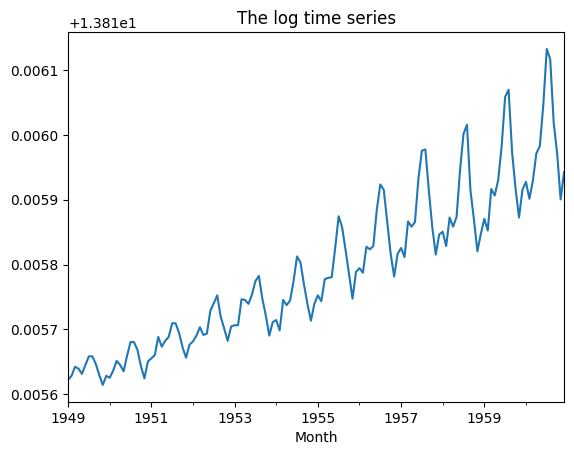

In [18]:
y_log = np.log(cigData.Cigarette_Sales)
ax = y_log.plot()
ax.set_title('The log time series');

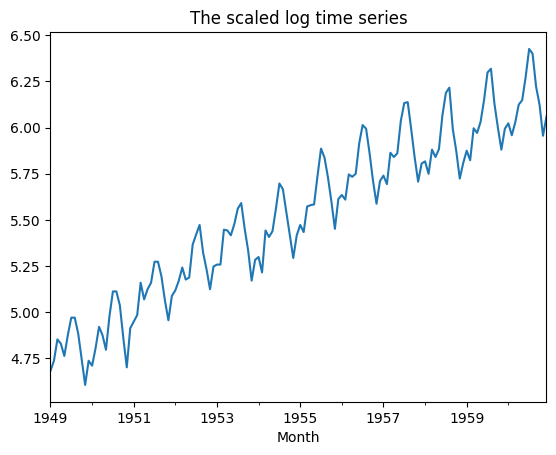

In [52]:
y_scaled_log = np.log(cigData.Cigarette_Sales - cigData.Cigarette_Sales.min()+100)
ax = y_scaled_log.plot()
ax.set_title('The scaled log time series');

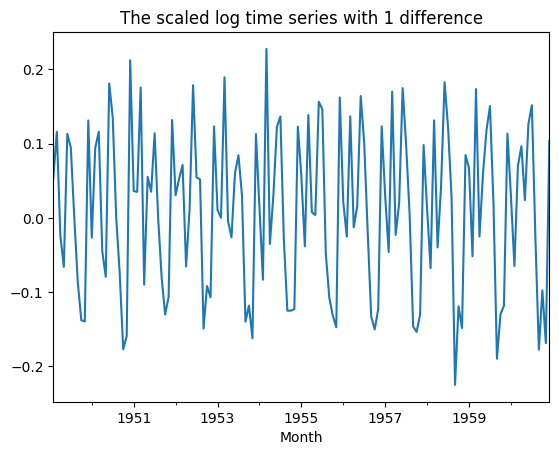

In [49]:
y_diff = y_scaled_log.diff()[1:]
# y_diff = y_log.diff()[1:]
ax = y_diff.plot()
ax.set_title('The scaled log time series with 1 difference');

In [50]:
arma = tsa.ARIMA(y_diff, order=(1,0,1)).fit()
arima = tsa.ARIMA(y_diff, order=(1,1,1)).fit()
# arma_pred = arma.forecast(24).cumsum() + y_diff[-1]
# arima_pred = arima.forecast(24)
arma_pred = arma.forecast(24)[1:]
arima_pred = arima.forecast(24).diff().dropna()

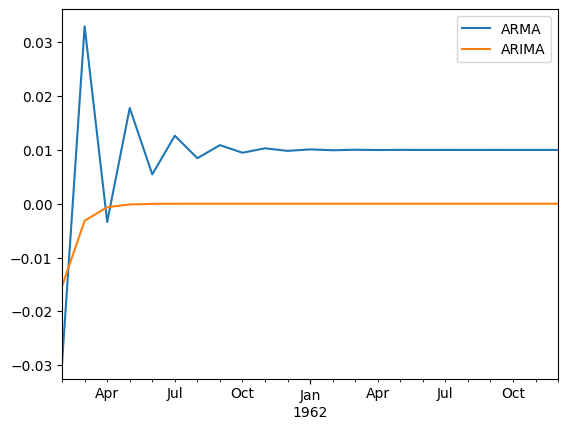

In [51]:
ax = arma_pred.plot(label='ARMA')
arima_pred.plot(ax=ax, label='ARIMA')
ax.legend();